# Forecast FHFA Default Rates for US States and MSAs

1. Install Dependencies
2. Import Packages
3. Read in FHFA Data
4. Prep Dataframe
5. Filter the DataFrame
6. Run Linear and Polynomial Regression

#### 1. Installing Dependencies

In [1]:
!pip install numpy
!pip install pandas

#### 2. Importing Packages

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib
from matplotlib import pyplot as plt
from sklearn import datasets, linear_model, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures


#### 3. Read in the FHFA Data

- df1 = States Data
- df2 = MSA Data

In [3]:
xls = pd.ExcelFile("C:/Users/ntran/Desktop\Data-Analysis\Datasets\FHFA\wp1902-data-supplement-May-2021.xlsx")
df1 = pd.read_excel(xls, "States")
df2 = pd.read_excel(xls, "MSAs")

#### 4. Prep Dataframe

- Removing All Columns Except: State, Origination Year, and Enterprise

In [4]:
df1 = df1.loc[:,df1.columns.intersection(['State','Origination Year','Enterprise'])]
df2 = df2.loc[:, df2.columns.intersection(['MSA','Origination Year','Enterprise'])]

X = np.array(df1.iloc[:,1])
y = np.array(df1.iloc[:,2])

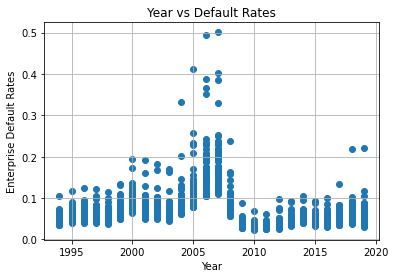

In [5]:
plt.scatter(X,y)
plt.grid()
plt.xlabel("Year")
plt.ylabel("Enterprise Default Rates")
plt.title("Year vs Default Rates")
plt.show()

#### 5. Split the DataFrames into Smaller DataFrames based on ColumnName

In [6]:
def filterDataFrame(dataFrame, columnName):
    # Create a list of unique states
    uniqueValues = dataFrame[columnName].unique()
    
    # Creating a DF dictionary to store data frames 
    DataFrameDict = {elem: pd.DataFrame for elem in uniqueValues}

    # Create a dictionary of dataframes for each unque state
    for key in DataFrameDict.keys():
        DataFrameDict[key] = dataFrame[:][dataFrame[columnName] == key]
    return DataFrameDict


#### 6. Function for Polynomial and Linear Regression


In [7]:
def polynomialRegression(dataFrame, polydegree, name, recession = False):
    # Drop NaN Values from the DataFrame
    dataFrame = dataFrame.dropna()
    # Initialize the Standard Scaler
    scaler = preprocessing.StandardScaler()
    
    # To remove values fr
    if recession == False:
        # Delete the examples from 2006, 2007, and 2008.
        # https://www.geeksforgeeks.org/how-to-drop-rows-in-dataframe-by-conditions-on-column-values/
        index_names = dataFrame[(dataFrame['Origination Year'] == 2006) | \
             (dataFrame['Origination Year'] == 2007) | (dataFrame['Origination Year'] == 2008)].index
        dataFrame.drop(index_names, inplace = True)

        # Convert the X and y Vectors to numpy arrays
        X = np.array(dataFrame.iloc[:,1]) #contains years
        y = np.array(dataFrame.iloc[:,2]) # contains enterprise default rates

        # Check to see if the target vector is empty
        if len(y) == 0:
            return print("No Data for + " + name)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

        X_train = np.reshape(X_train, (-1,1))
        X_test = np.reshape(X_test, (-1,1))
        y_train = np.reshape(y_train, (-1,1))
        y_test = np.reshape(y_test, (-1,1))

        X_train = scaler.fit_transform(X_train)
        X_test = scaler.fit_transform(X_test)
        y_train = scaler.fit_transform(y_train)
        y_test = scaler.fit_transform(y_test)

        X = np.reshape(X,(-1,1))
        y = np.reshape(y,(-1,1))
        
        # Fitting the Linear Model
        linRegr = linear_model.Lasso(alpha = 0.1)
        linRegr.fit(X,y)

        # Fitting the Polnynomial Model
        polyRegr = PolynomialFeatures(degree = polydegree)
        X_poly = polyRegr.fit_transform(X)
        polyRegr.fit(X_poly, y)
        linRegr2 = LinearRegression()
        linRegr2.fit(X_poly, y)
    
        linPred1 = linRegr.predict([[2020]])
        linPred2 = linRegr.predict([[2021]])
        polyPred1 = linRegr2.predict(polyRegr.fit_transform([[2020]]))
        polyPred2 = linRegr2.predict(polyRegr.fit_transform([[2021]]))
        """
        print(name + "'s Enterprise Default Rates for 2020 and 2021 [Recession removed]")
        print("2020 Linear: " + str(linPred1[0]))
        print("2020 Poly: " + str(polyPred1[0][0]))
        print("2021 Linear: " + str(linPred2[0]))
        print("2021 Poly: " + str(polyPred2[0][0]))
          
        """
        # Visualising the Linear Regression results
        plt.scatter(X, y, color = 'red')
        plt.plot(X, linRegr.predict(X), color = 'blue')
        plt.title(name + ' default rates [NO RECESSION]')
        plt.ylabel('Enterprise Default Rate')
        plt.xlabel('Year')

        # Visualising the Polynomial Regression results (for higher resolution and smoother curve)
        X_grid = np.arange(min(X), max(X), 0.1)
        X_grid = X_grid.reshape((len(X_grid), 1))
        plt.scatter(X, y, color = 'red')
        plt.plot(X_grid, linRegr2.predict(polyRegr.fit_transform(X_grid)), color = 'blue')
        plt.title(name + ' default rates (Polynomial Regression) [NO RECESSION]')
        plt.ylabel('Enterprise Default Rate')
        plt.xlabel('Year')
        plt.figure()
        plt.show()
        
    else:

        # Convert the X and y Vectors to numpy arrays
        X = np.array(dataFrame.iloc[:,1])
        y = np.array(dataFrame.iloc[:,2])

        if len(y) == 0:
            return print("No Data for + " + name)
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

        X_train = np.reshape(X_train, (1,-1))
        X_test = np.reshape(X_test, (1,-1))
        y_train = np.reshape(y_train, (1,-1))
        y_test = np.reshape(y_test, (1,-1))

        X_train = scaler.fit_transform(X_train)
        X_test = scaler.fit_transform(X_test)
        y_train = scaler.fit_transform(y_train)
        y_test = scaler.fit_transform(y_test)

        X = np.reshape(X,(-1,1))
        y = np.reshape(y,(-1,1))

        # Fitting the Linear Model
        linRegr = linear_model.Lasso(alpha = 0.1)
        linRegr.fit(X,y)

        # Fitting the Polnynomial Model

        polyRegr = PolynomialFeatures(degree = polydegree)
        X_poly = polyRegr.fit_transform(X)
        polyRegr.fit(X_poly, y)
        linRegr2 = LinearRegression()
        linRegr2.fit(X_poly, y)

        linPred1 = linRegr.predict([[2020]])
        linPred2 = linRegr.predict([[2021]])
        polyPred1 = linRegr2.predict(polyRegr.fit_transform([[2020]]))
        polyPred2 = linRegr2.predict(polyRegr.fit_transform([[2021]]))

        """
        print("Recession included")
        print(name + "'s Enterprise Default Rates for 2020 and 2021")
        print("2020 Linear: " + str(linPred1[0]))
        print("2020 Poly: " + str(polyPred1[0][0]))
        print("2021 Linear: " + str(linPred2[0]))
        print("2021 Poly + " + str(polyPred2[0][0]))
        """
        # Visualising the Linear Regression results
        plt.scatter(X, y, color = 'red')
        plt.plot(X, linRegr.predict(X), color = 'blue')
        plt.title(name + ' default rates [With Recession]')
        plt.ylabel('Enterprise Default Rate')
        plt.xlabel('Year')

        # Visualising the Polynomial Regression results (for higher resolution and smoother curve)
        X_grid = np.arange(min(X), max(X), 0.1)
        X_grid = X_grid.reshape((len(X_grid), 1))
        plt.scatter(X, y, color = 'red')
        plt.plot(X_grid, linRegr2.predict(polyRegr.fit_transform(X_grid)), color = 'blue')
        plt.title(name + ' default rates (Polynomial Regression) [With RECESSION]')
        plt.ylabel('Enterprise Default Rate')
        plt.xlabel('Year')
        plt.figure()
        plt.show()


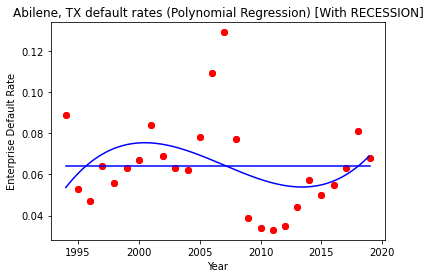

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


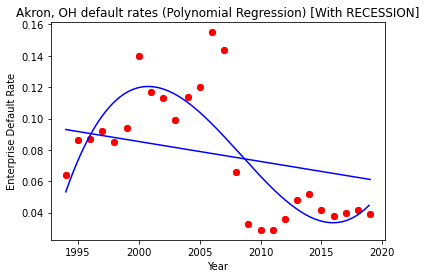

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


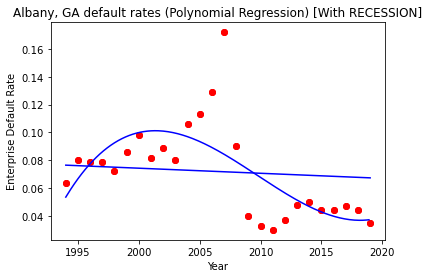

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


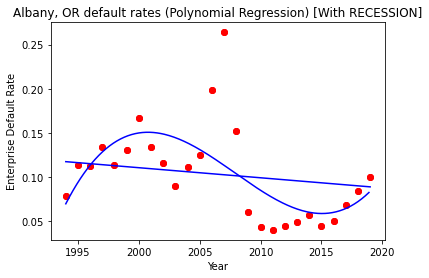

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


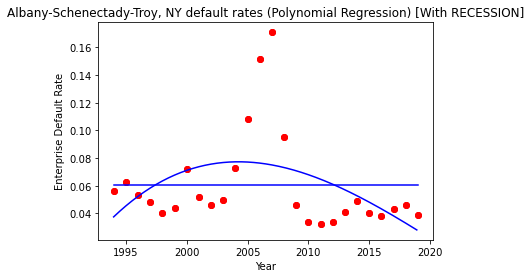

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


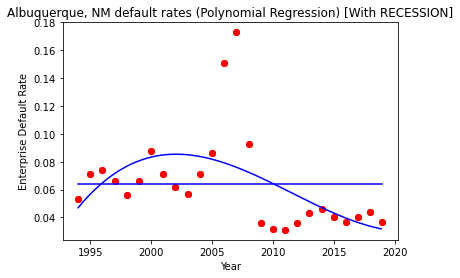

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


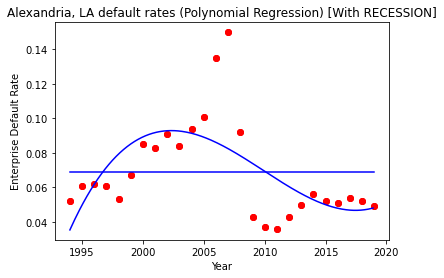

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


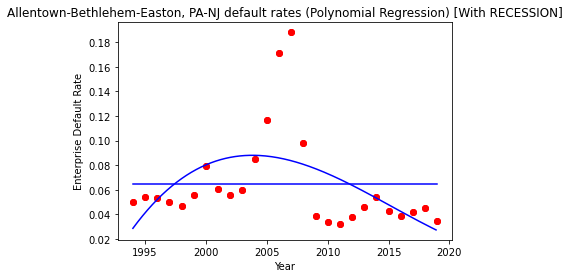

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


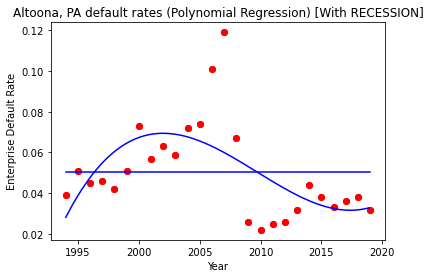

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


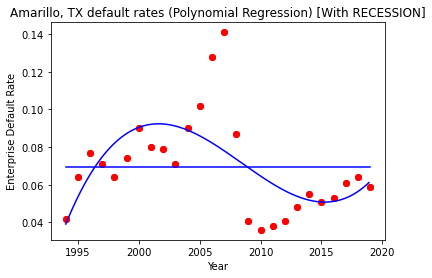

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


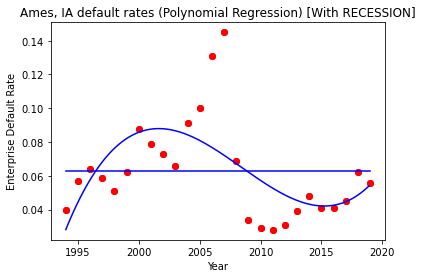

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


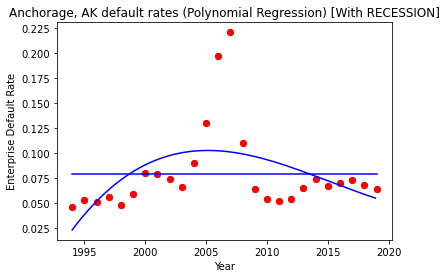

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


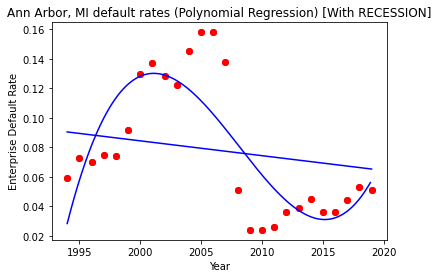

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


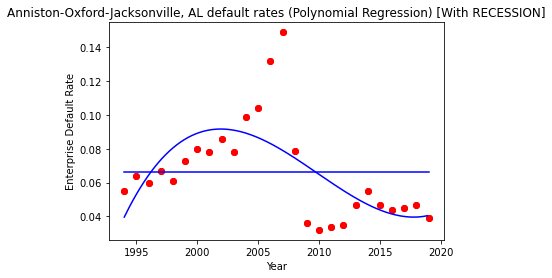

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


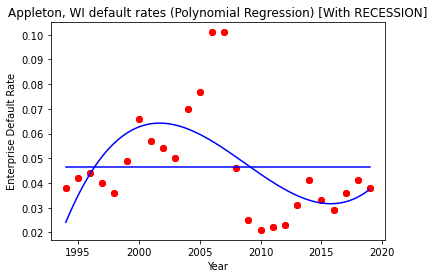

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


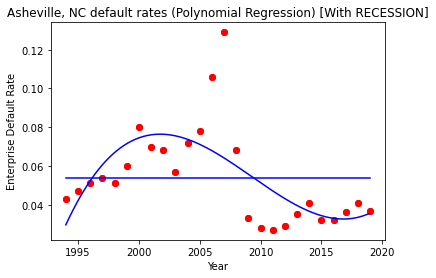

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


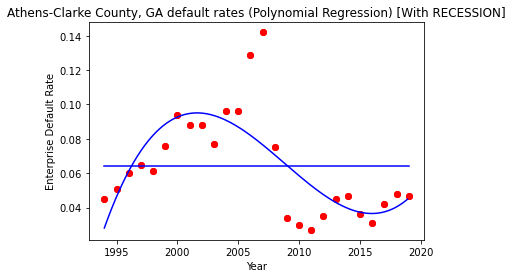

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


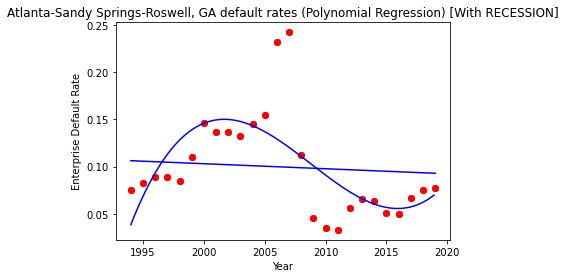

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


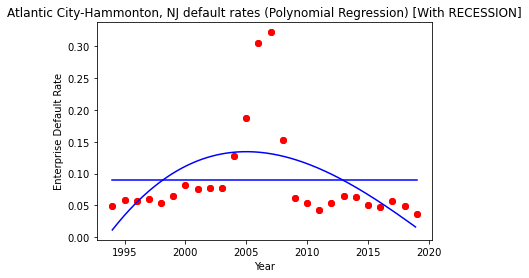

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


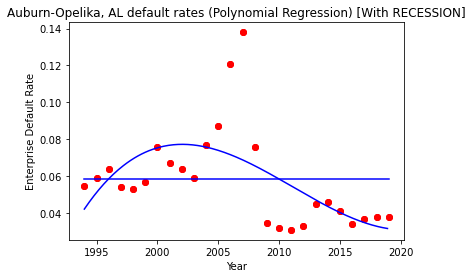

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


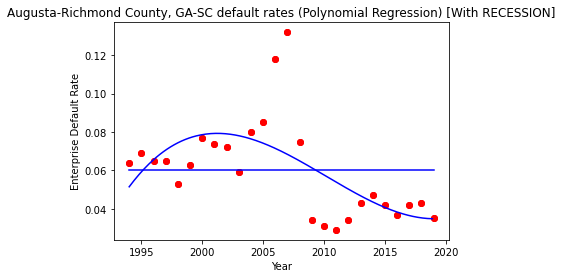

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


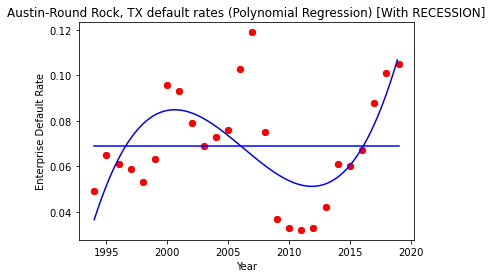

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


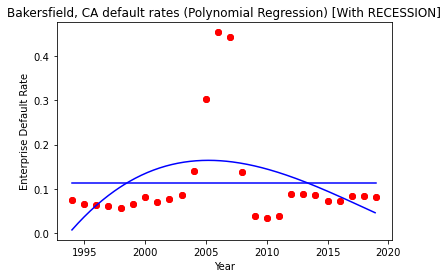

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


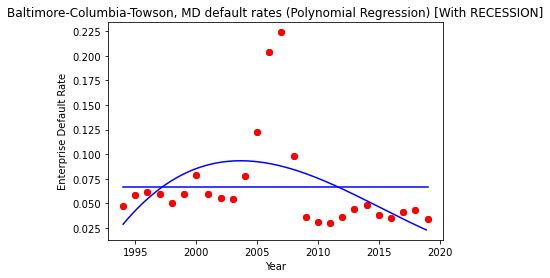

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


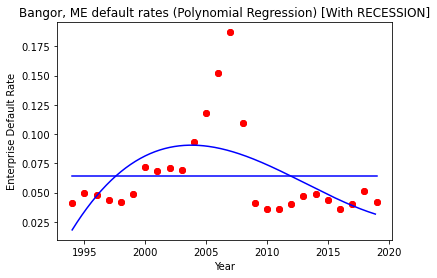

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


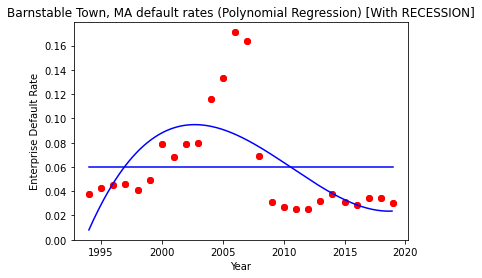

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


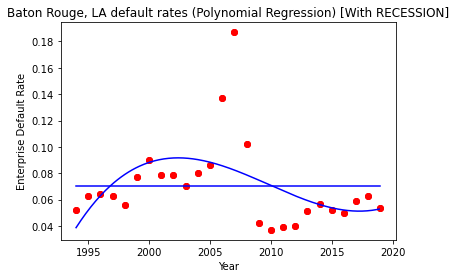

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


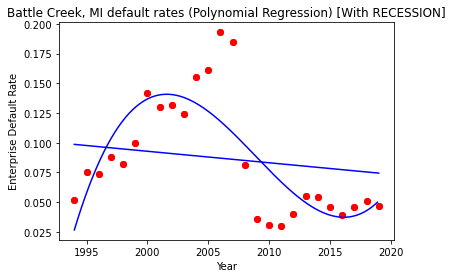

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


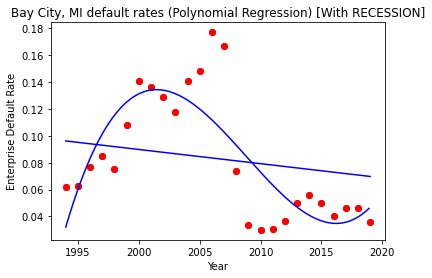

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


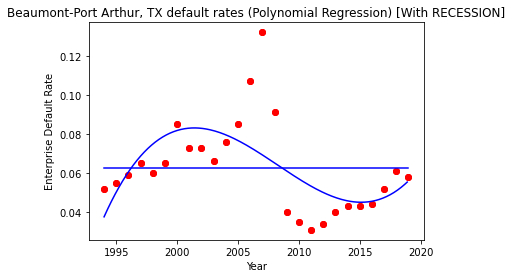

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


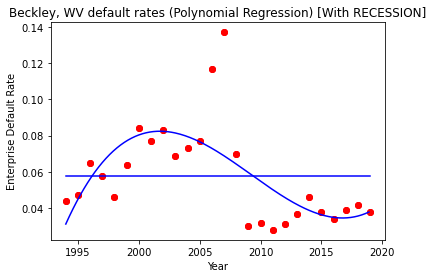

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


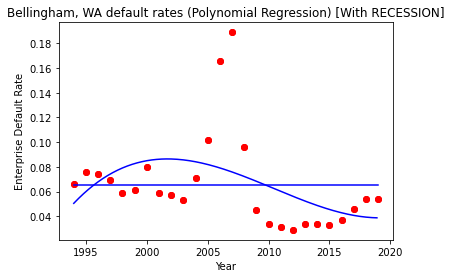

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


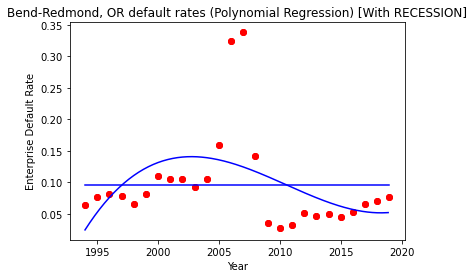

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


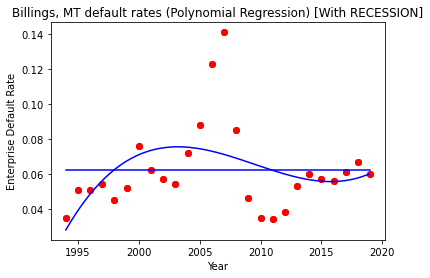

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


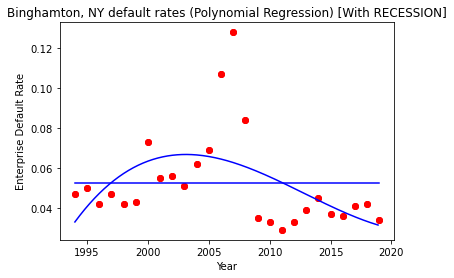

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


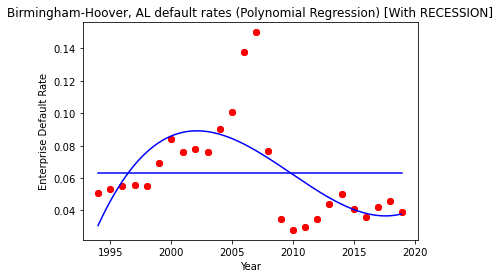

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


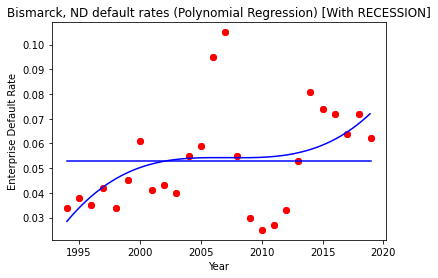

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


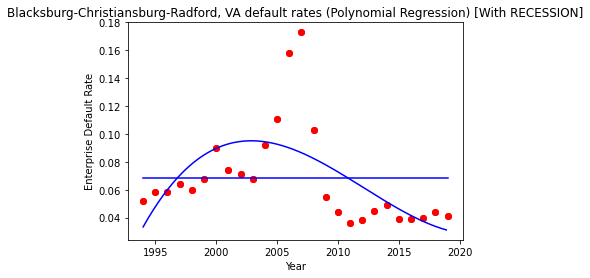

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


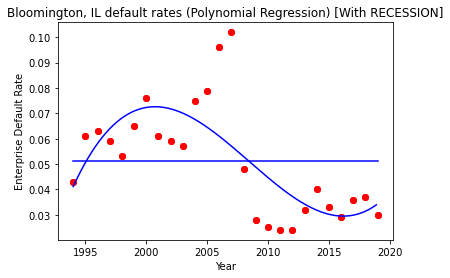

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


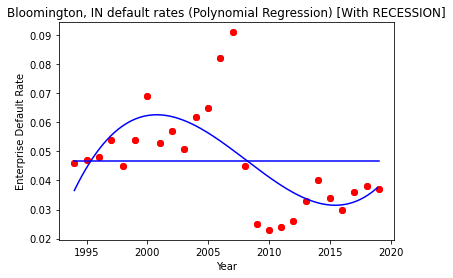

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


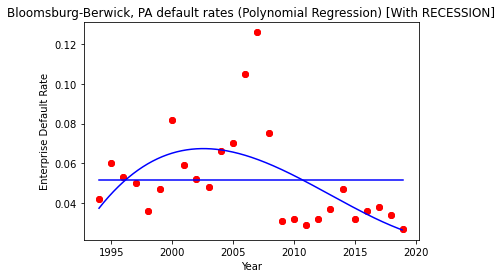

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


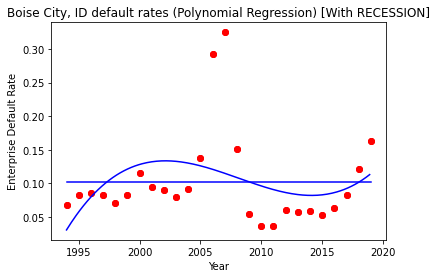

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


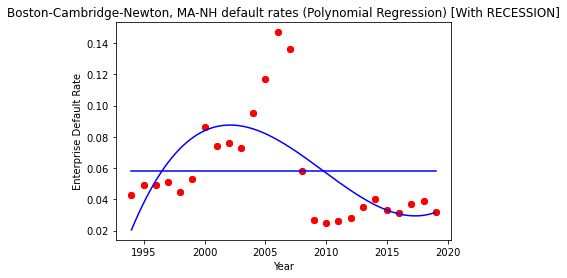

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


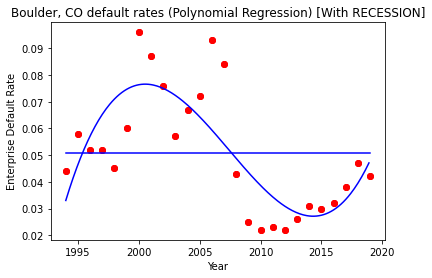

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


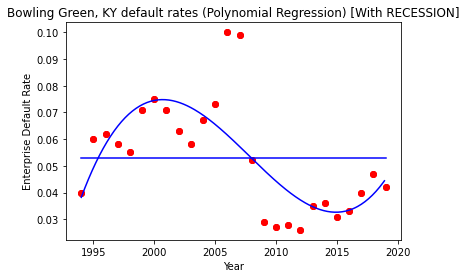

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


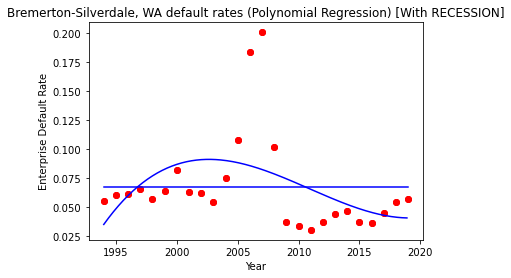

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


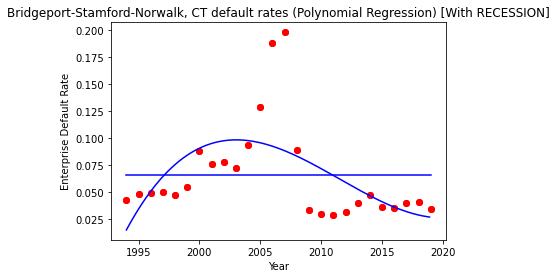

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


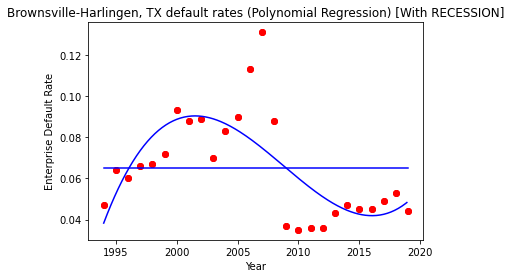

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


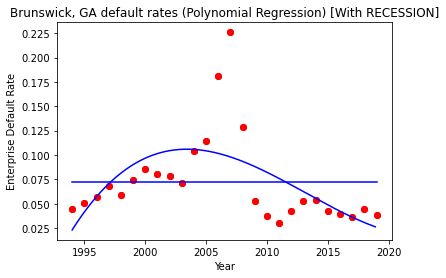

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


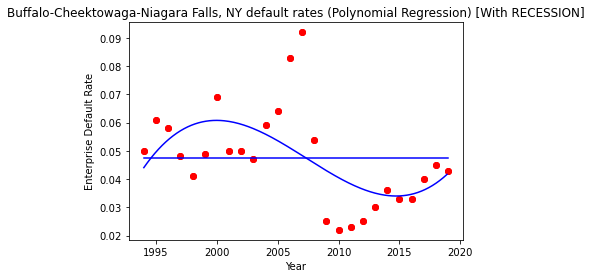

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


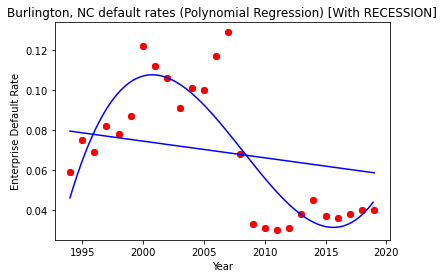

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


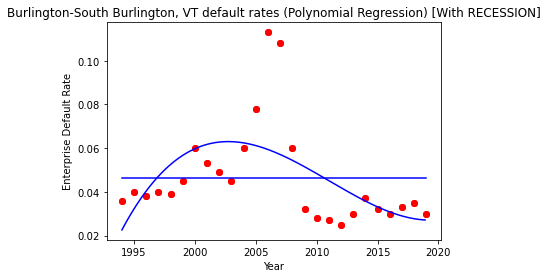

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


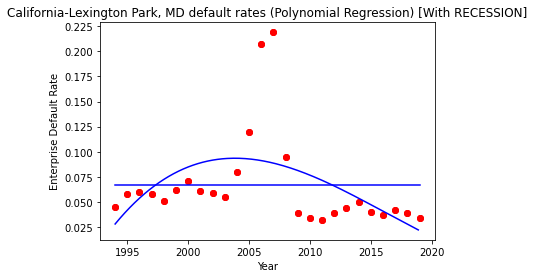

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


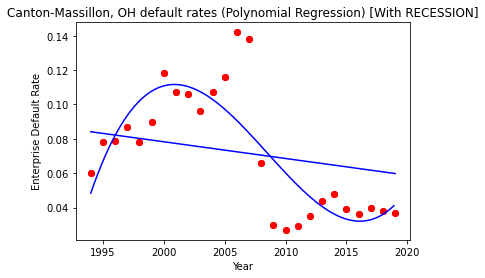

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


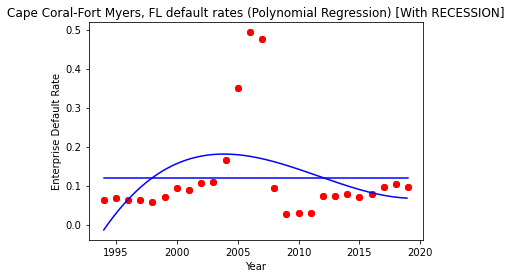

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


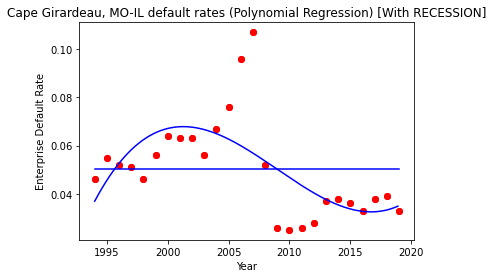

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


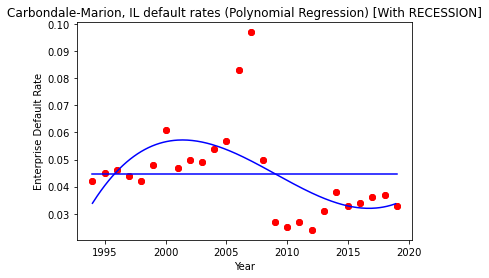

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


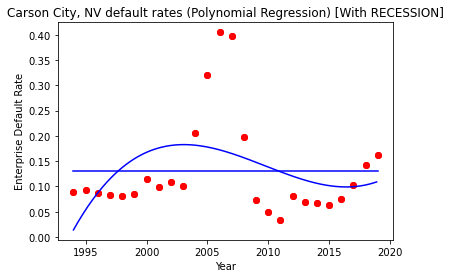

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


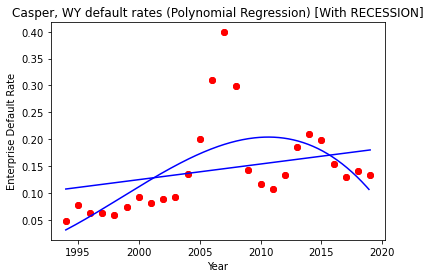

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


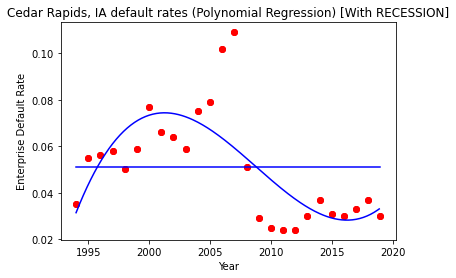

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


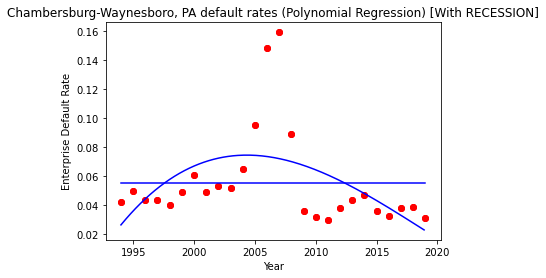

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


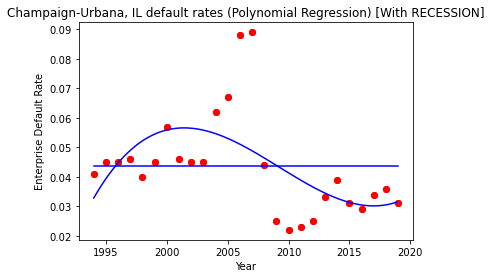

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


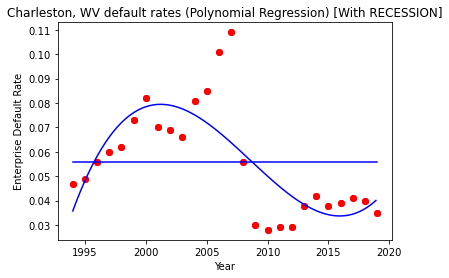

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


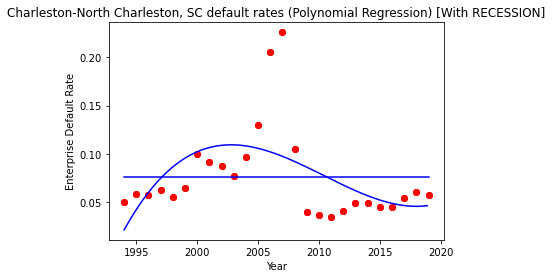

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


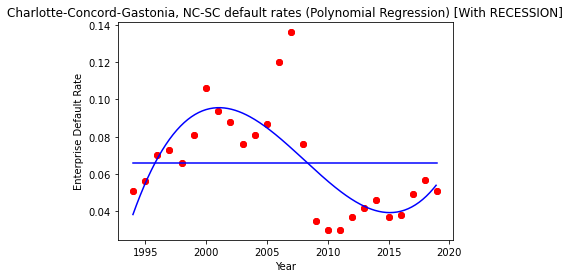

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


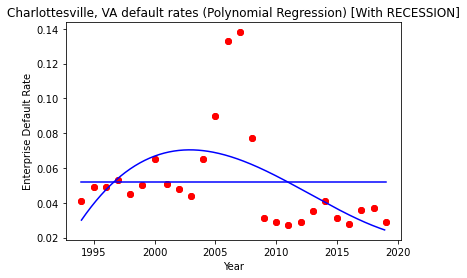

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


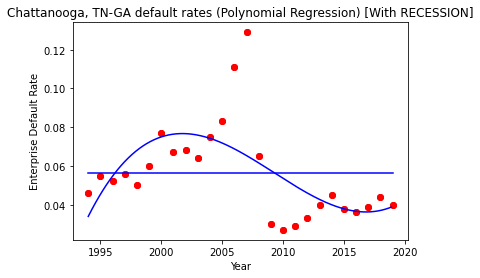

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


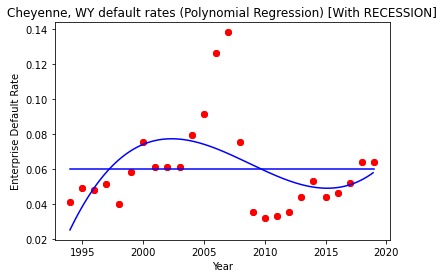

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


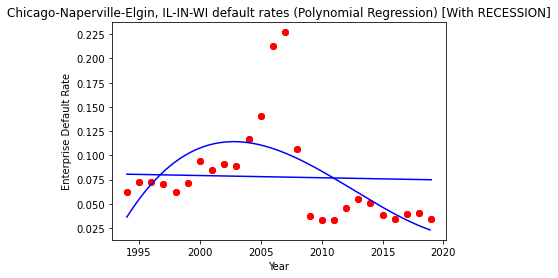

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


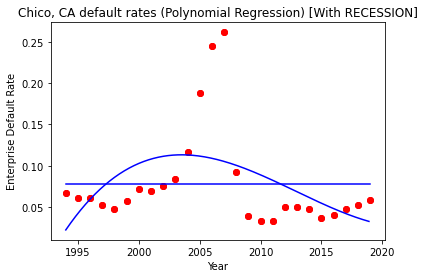

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


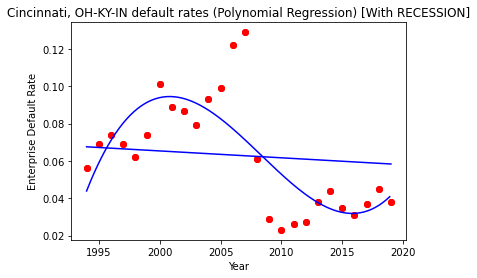

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


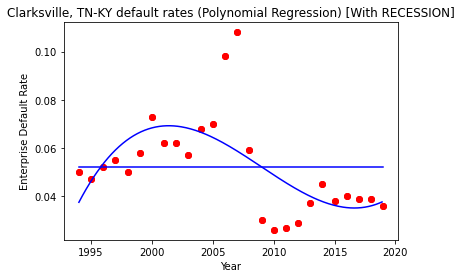

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


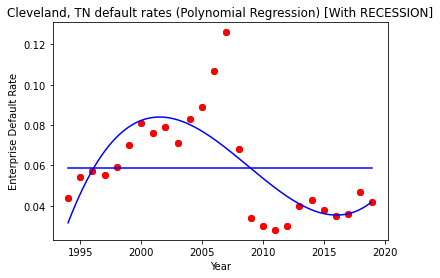

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


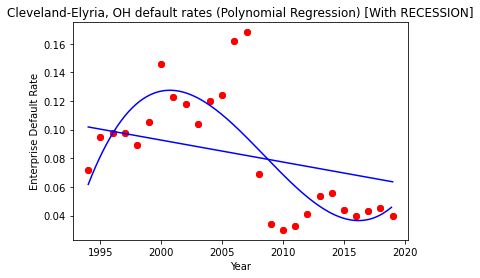

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


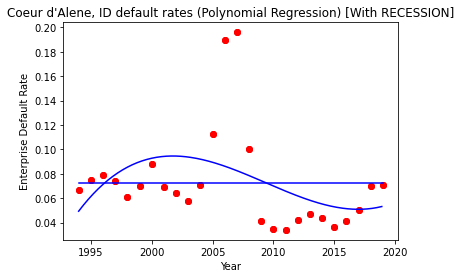

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


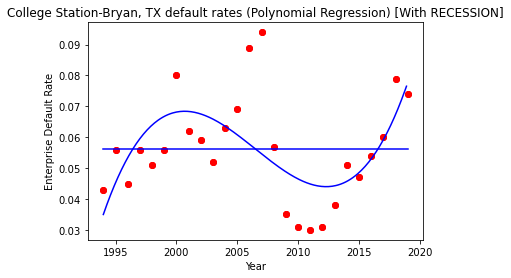

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


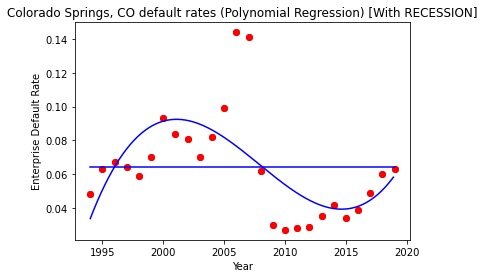

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


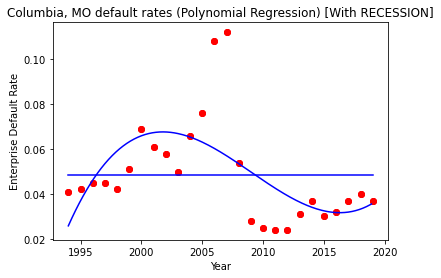

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


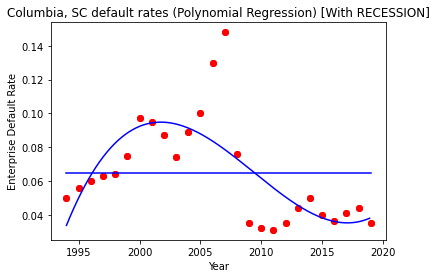

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


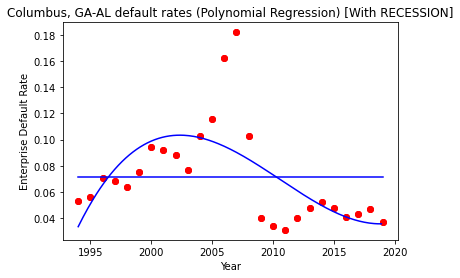

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


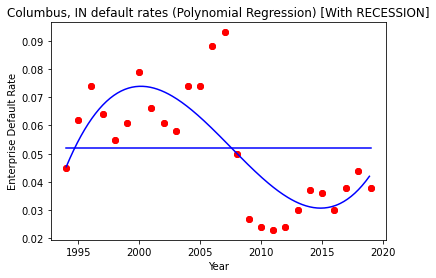

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


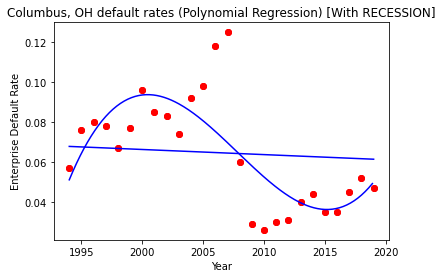

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


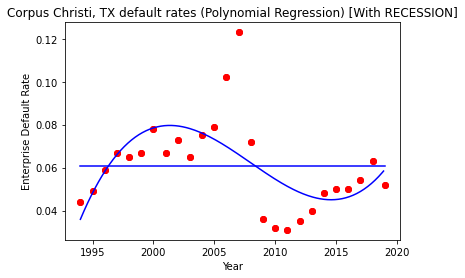

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


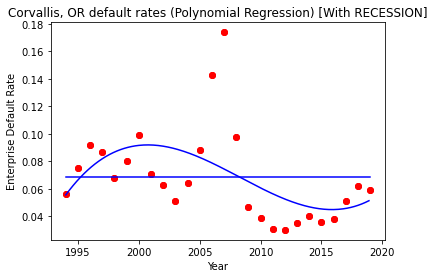

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


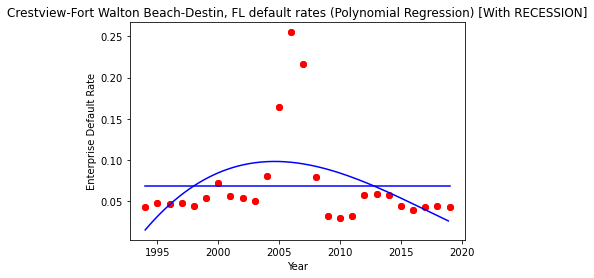

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


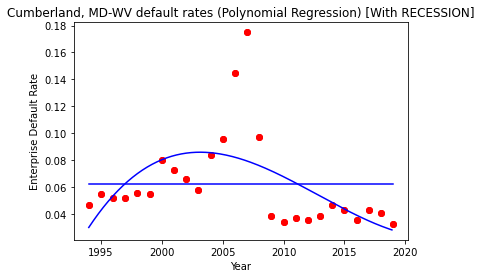

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


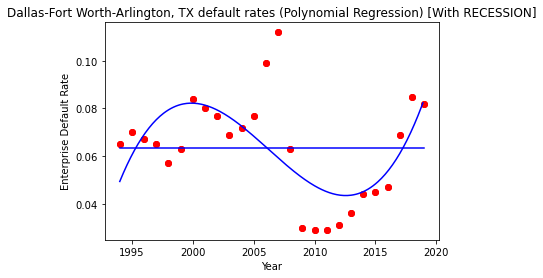

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


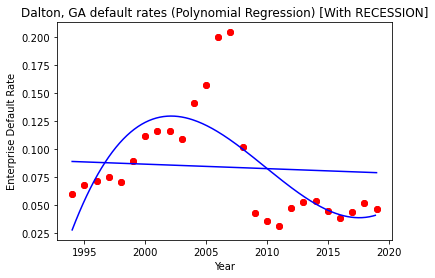

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


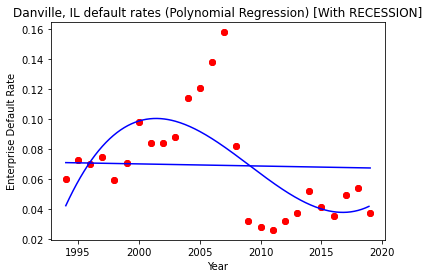

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


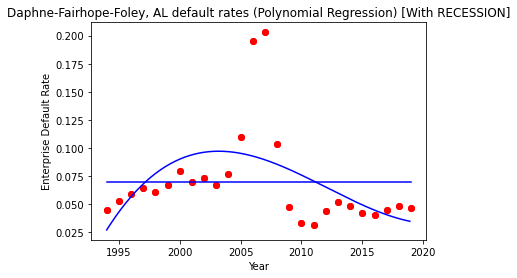

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


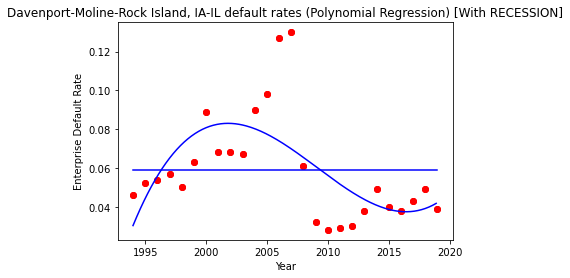

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


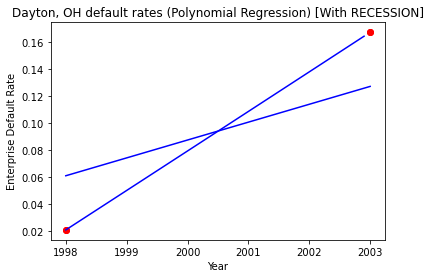

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


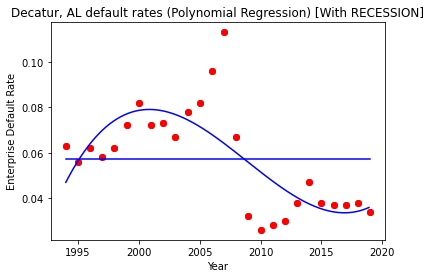

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


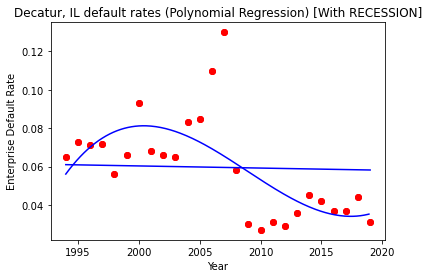

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


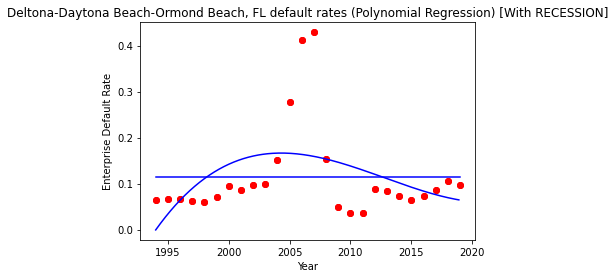

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


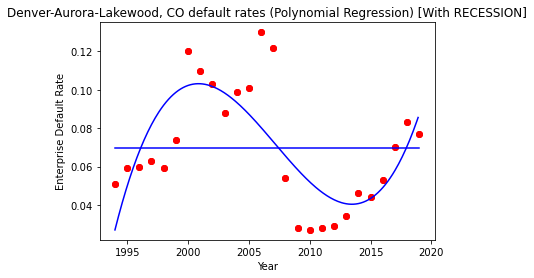

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


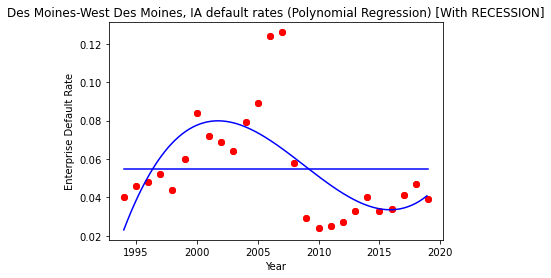

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


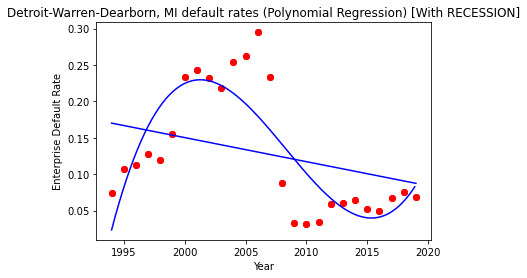

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


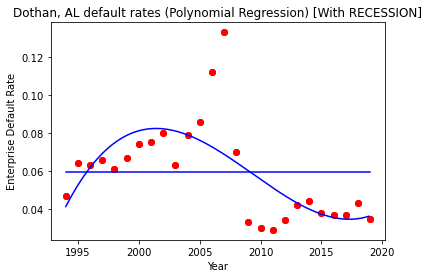

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


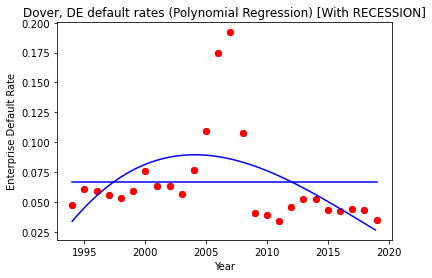

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


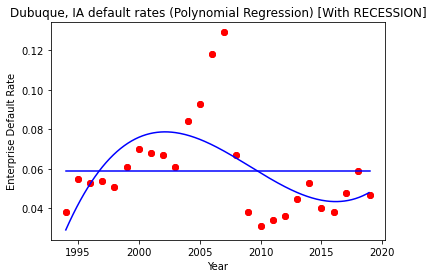

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


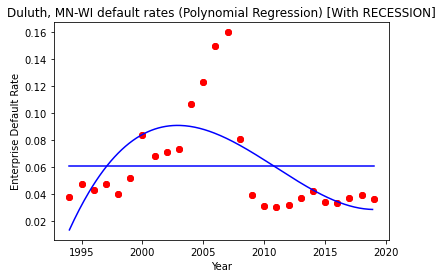

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


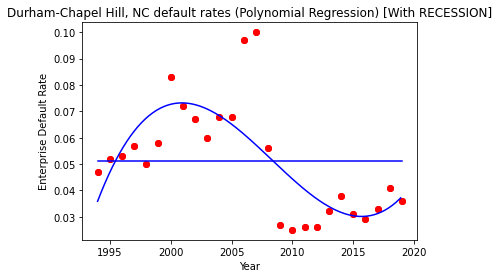

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


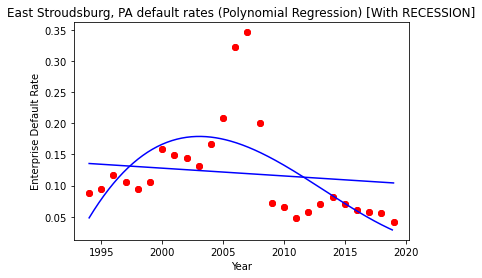

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


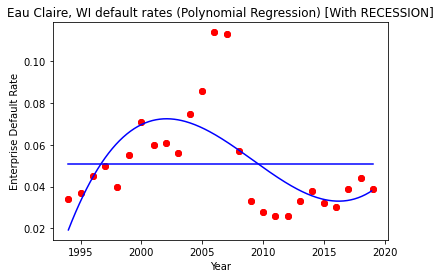

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


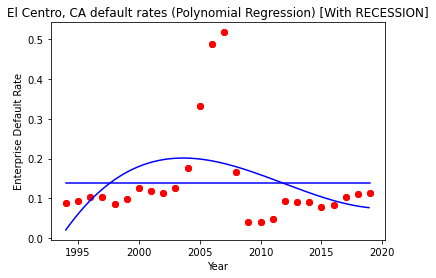

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


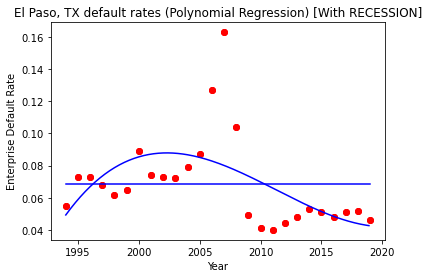

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


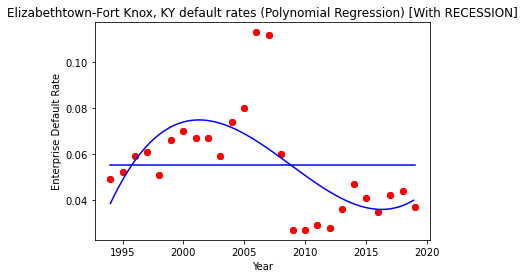

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


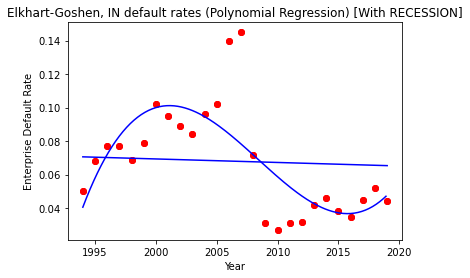

<Figure size 432x288 with 0 Axes>

----------------------------------------------------


In [9]:
msaFilteredDF = filterDataFrame(df2, "MSA")

for region in msaFilteredDF:
    polynomialRegression(msaFilteredDF[region], 3, region, True) # False removes the years 2006, 07, and 08
    print("----------------------------------------------------")

In [ ]:
stateFilteredDF = filterDataFrame(df1, "State")
for region in stateFilteredDF:
    polynomialRegression(stateFilteredDF[region], 3, region, True) # False removes the years 2006, 07, and 08